# Logistic Regression

Logistic Regression is a Binary Classification Algorithm that is used when the target variable is categorical. It models the probability of a certain class (like 0 or 1) using a logistic(sigmoid) function.

The goal of logistic regression is to find the best-fitting model that predicts the probability of an instance belonging to a particular class. The model outputs values between 0 and 1, which are interpreted as probabilities.

The following program implements Logistic Regression using only NumPy, Pandas and MatPlotLib.


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

## Loading Data

In [3]:
CSVPATH = 'purchase.csv'
df = pd.read_csv(CSVPATH)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.drop('User ID', axis=1).dropna()

In [5]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})

/tmp/ipykernel_152833/2087688777.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})


## Pre-Processing

In [6]:
dat = df.to_numpy()
np.random.shuffle(dat)
x = dat[:,0:-1]

In [7]:
y = dat[:,-1]

In [8]:
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

In [9]:
x = x.astype(float)
x[:,1:3] = (x[:,1:3]-x_mean[1:3])/x_std[1:3]
x = np.hstack([np.ones((400,1)),x])

In [10]:
l_train, l_test = 320,80
train_x, test_x = x[0:l_train,:], x[l_train:,:]
train_y, test_y = y[0:l_train], y[l_train:]
print(train_x)

[[ 1.          0.         -0.25358736 -0.37418169]
 [ 1.          1.          0.70154394 -1.28449224]
 [ 1.          0.         -0.92217926 -0.96147882]
 ...
 [ 1.          1.          0.22397829 -0.25672226]
 [ 1.          0.         -0.15807423 -0.46227625]
 [ 1.          0.         -1.11320552 -0.78528968]]


## Training- Batch Gradient Descent

In [11]:
alpha = 0.01
parameters = 3
theta = np.zeros(parameters+1)
prevcost = float('inf')
threshold = 1e-6

In [12]:
while True:
    hypothesis = sigmoid(train_x @ theta)
    theta = theta + (alpha / l_train) * (train_x.T @ (train_y - hypothesis))
    currcost = (1 / (2 * l_train)) * np.sum(np.square(train_y-hypothesis))
    if currcost-prevcost <= threshold:
        break
    prevcost = currcost

## Testing

In [13]:
test_predictions = sigmoid(test_x @ theta) >= 0.5
accuracy = np.mean(test_predictions == test_y) * 100
print("Test Accuracy:", accuracy, "%")

Test Accuracy: 81.25 %


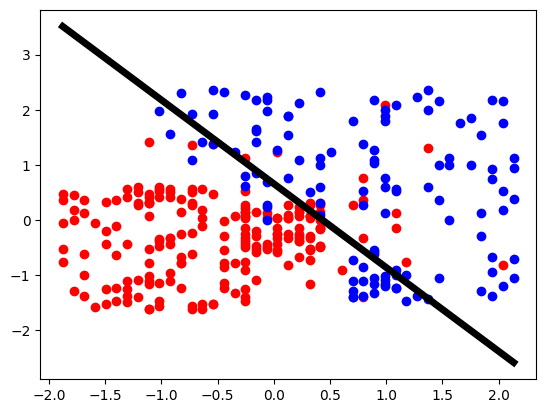

In [14]:
plt.scatter(train_x[train_y==0][:,2],train_x[train_y==0][:,3],color="red")
plt.scatter(train_x[train_y==1][:,2],train_x[train_y==1][:,3],color="blue")

x1_min = train_x[:, 2].min()
x1_max = train_x[:, 2].max()

x2_min = (-theta[2] * x1_min - theta[0]) / theta[3]
x2_max = (-theta[2] * x1_max - theta[0]) / theta[3]
plt.plot([x1_min, x1_max], [x2_min, x2_max], color="black", lw=5)